This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

Key Features:

Order_ID: Unique identifier for each order.

Distance_km: The delivery distance in kilometers.

Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

Preparation_Time_min: The time required to prepare the order, measured in minutes.

Courier_Experience_yrs: Experience of the courier in years.

Delivery_Time_min: The total delivery time in minutes (target variable).

Objectives: Predicting food delivery times.

*   **Improve Customer Satisfaction:** Provide accurate delivery time estimates manages customer expectations and reduce frustration.
*   **Optimize Operations:** Streamline delivery routes, allocate resources efficiently (vehicles and couriers), and balance workloads to achieve cost savings and faster service.
*   **Enhance Decision Making:** Supply data-driven insights for strategic planning, including service area selection, staffing requirements, and pricing strategies.
*   **Reduce Delivery Issues:** Anticipate potential delays caused by factors such as traffic or adverse weather, enabling proactive measures to maintain on-time delivery and service reliability.

Key Questions:

1. How does the delivery distance (`Distance_km`) relate to the `Delivery_Time_min`?
2. What is the distribution of delivery times across different `Weather` conditions and `Traffic_Level`?
3. Is there a significant difference in `Delivery_Time_min` based on the `Vehicle_Type` used?
4. How does the `Time_of_Day` affect the `Delivery_Time_min`?
5. Does the `Courier_Experience_yrs` have an impact on the `Delivery_Time_min`?

# Import Libraries

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
sns.set_style({
  'axes.facecolor': '#f3f3f3ff',
  'figure.facecolor': '#f3f3f3ff',
})

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load Data

In [ ]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [ ]:
# Show 5 sample data
df.sample(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
945,981,7.02,Clear,Medium,Evening,Car,23,2.0,53
581,20,6.18,Clear,Medium,Evening,Bike,9,9.0,35
783,377,16.98,Clear,Low,NaN,Bike,11,6.0,78
654,970,9.78,Clear,Medium,Afternoon,Bike,18,3.0,58
706,148,10.30,Rainy,Low,Evening,Bike,29,0.0,73


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


There are missing values in Weather, Traffic_Level, Time_of_Day, and Courier_Experience_yrs columns.

In [ ]:
# Change Order_ID column data type into object
df['Order_ID'] = df['Order_ID'].astype('object')

In [ ]:
# Define categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Exclude Order_ID columns from categorical data
categorical_cols = categorical_cols.drop('Order_ID')
categorical_cols

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

In [ ]:
# Define numerical columns
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

## Check duplicate data

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicate records.

## Check missing values

In [ ]:
# Check the unique value of each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique().tolist()}")

Weather: ['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan]
Traffic_Level: ['Low', 'Medium', 'High', nan]
Time_of_Day: ['Afternoon', 'Evening', 'Night', 'Morning', nan]
Vehicle_Type: ['Scooter', 'Bike', 'Car']


In [ ]:
# Check the missing value percentage of each column
for col in df.columns:
    print(f"The percentage of missing values of {col}: {df[col].isna().sum()/len(df)*100:.2f}%")

The percentage of missing values of Order_ID: 0.00%
The percentage of missing values of Distance_km: 0.00%
The percentage of missing values of Weather: 3.00%
The percentage of missing values of Traffic_Level: 3.00%
The percentage of missing values of Time_of_Day: 3.00%
The percentage of missing values of Vehicle_Type: 0.00%
The percentage of missing values of Preparation_Time_min: 0.00%
The percentage of missing values of Courier_Experience_yrs: 3.00%
The percentage of missing values of Delivery_Time_min: 0.00%


There are 3% missing values in columns Weather, Traffic_Level, Time_of_Day, and Courier_Experience_yrs, which will be handled after the data split.

In [ ]:
 # Display the mode of categorical features by vehicle type, because vehicle type is the only categorical feature with no missing values
for col in categorical_cols.drop('Vehicle_Type'):
    print(f"{col}: {df.groupby('Vehicle_Type')[col].apply(lambda x: x.mode()[0])}")

Weather: Vehicle_Type
Bike       Clear
Car        Clear
Scooter    Clear
Name: Weather, dtype: object
Traffic_Level: Vehicle_Type
Bike       Medium
Car           Low
Scooter    Medium
Name: Traffic_Level, dtype: object
Time_of_Day: Vehicle_Type
Bike       Evening
Car        Morning
Scooter    Morning
Name: Time_of_Day, dtype: object


In [ ]:
# Handle missing values for categorical feature using its mode per vehicle type
for col in categorical_cols.drop('Vehicle_Type'):
    for vehicle_type, group_train in df.groupby('Vehicle_Type'):
        mode_value = group_train[col].mode()
        if not mode_value.empty:
            df.loc[group_train.index, col] = df.loc[group_train.index, col].fillna(mode_value[0])

In [ ]:
# Recheck missing values
for col in categorical_cols:
    print(f"{col}: {df[col].unique().tolist()}")

Weather: ['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy']
Traffic_Level: ['Low', 'Medium', 'High']
Time_of_Day: ['Afternoon', 'Evening', 'Night', 'Morning']
Vehicle_Type: ['Scooter', 'Bike', 'Car']


In [ ]:
# Display the median of Courier_Experience_yrs column by vehicle type
df.groupby('Vehicle_Type')['Courier_Experience_yrs'].median()

,Courier_Experience_yrs
Vehicle_Type,
Bike,5.0
Car,4.0
Scooter,4.0


In [ ]:
# Handle missing values for Courier_Experience_yrs column using its median per vehicle type
for vehicle_type, group_train in df.groupby('Vehicle_Type'):
    median_value = group_train['Courier_Experience_yrs'].median()
    df.loc[group_train.index, 'Courier_Experience_yrs'] = df.loc[group_train.index, 'Courier_Experience_yrs'].fillna(median_value)

In [ ]:
# Recheck missing values
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


## Check outliers

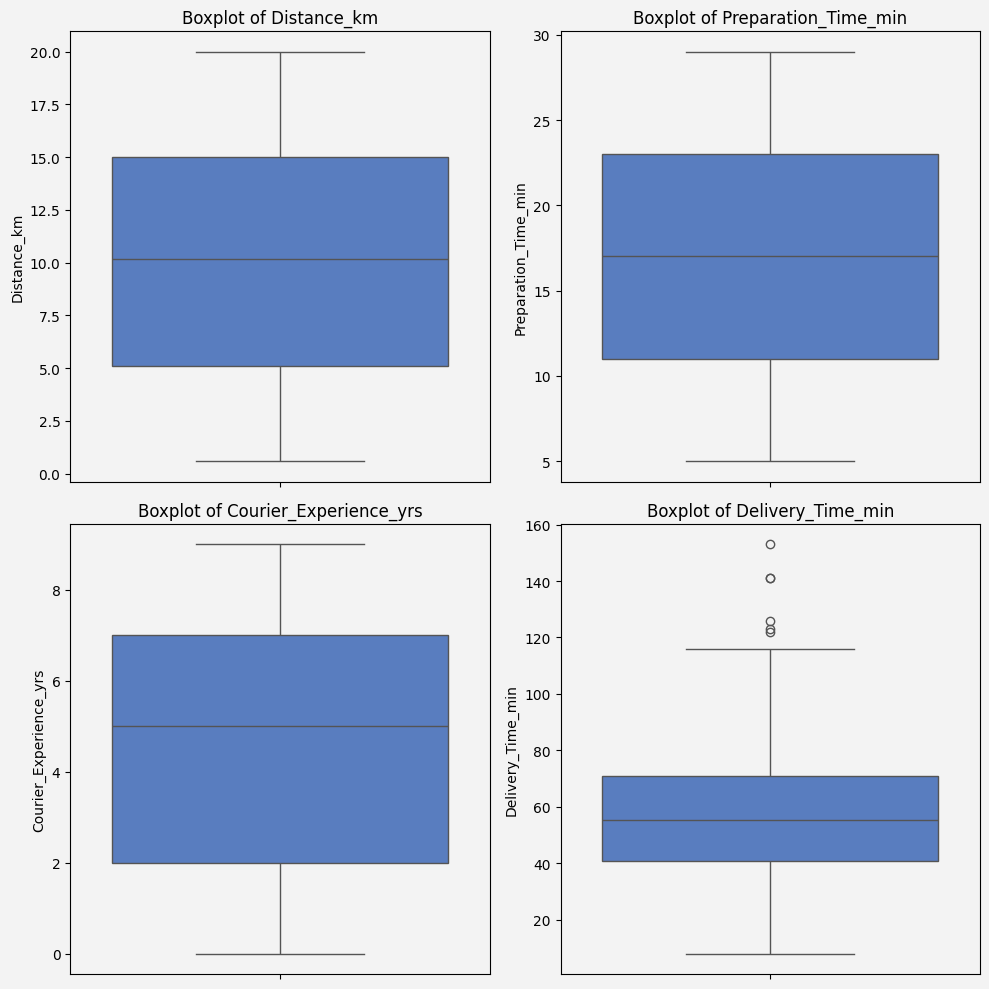

In [ ]:
# Select the numerical columns
# Create a 2x2 grid for 4 plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], palette='muted', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Turn off unused axes if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There are no outliers that need to be handled.

## Statistical summary

In [ ]:
df.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,10.059970,16.982000,4.57700,56.732000
std,5.696656,7.204553,2.87164,22.070915
min,0.590000,5.000000,0.00000,8.000000
25%,5.105000,11.000000,2.00000,41.000000
50%,10.190000,17.000000,5.00000,55.500000
75%,15.017500,23.000000,7.00000,71.000000
max,19.990000,29.000000,9.00000,153.000000


## Check data distribution

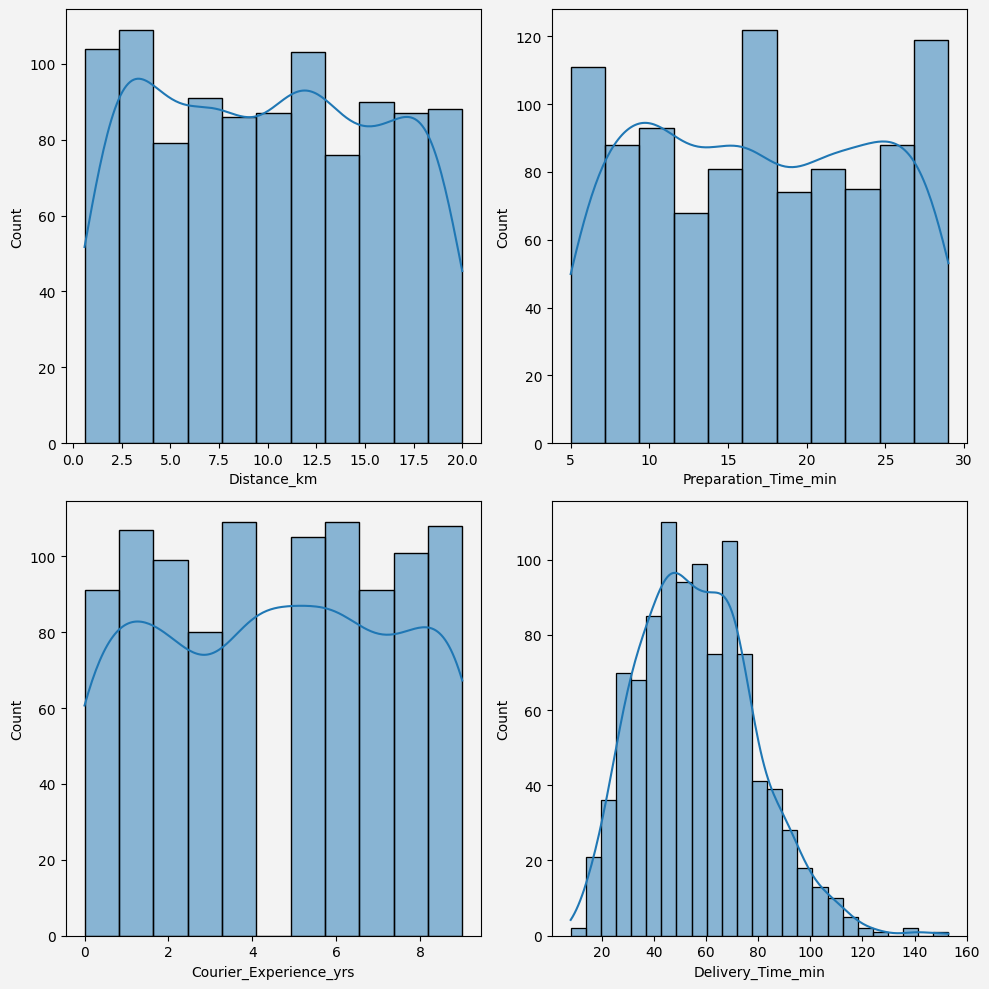

In [ ]:
# Select the numerical columns
# Create a 2x2 grid for 4 plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])

# Turn off unused axes if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. The delivery distances are fairly spread out, with subtle peaks around 2.5 km and 12.5 km.
2. Most orders are prepared within 10–25 minutes, peaking around 15 minutes.
3. Courier experience is quite evenly distributed, with slight peaks around 4 years.
4. The delivery time is right-skewed, with most deliveries taking 30–80 minutes, peaking around 50 minutes.

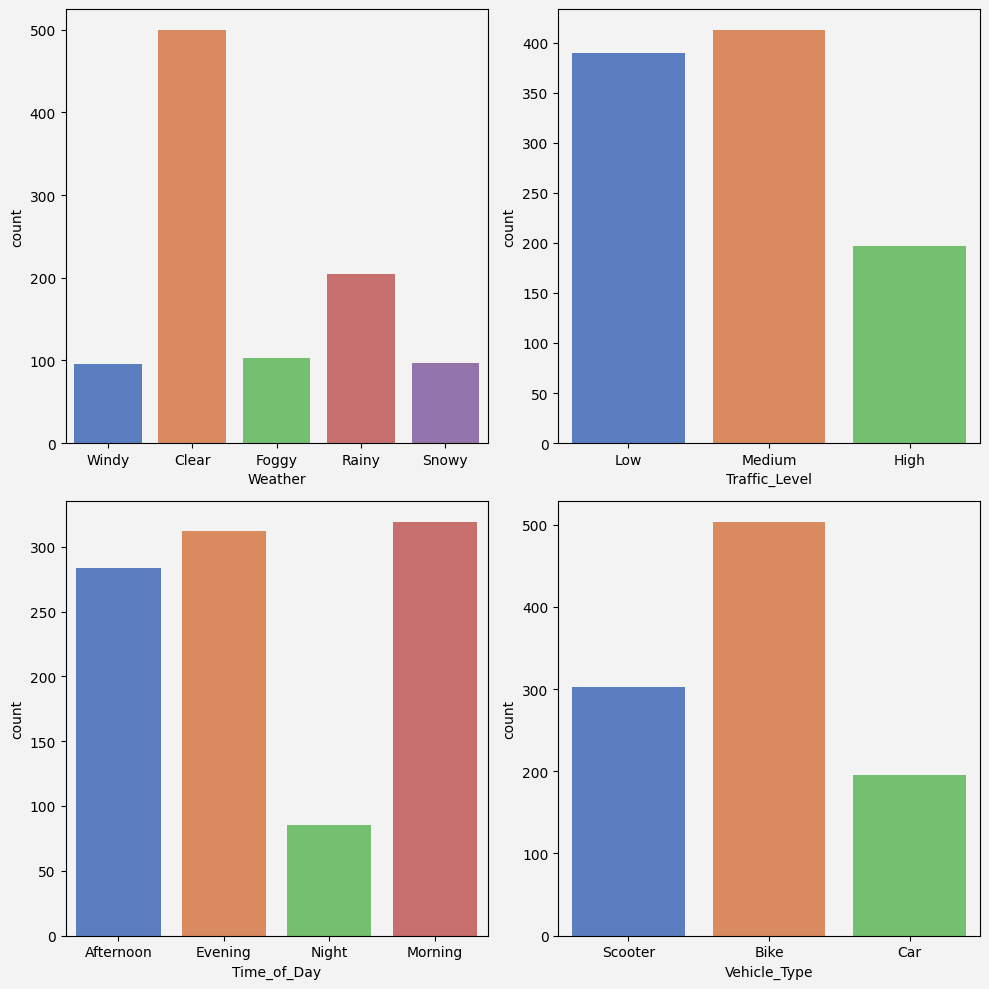

In [ ]:
# Select the categorical columns
# Create a 2x2 grid for 4 plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(categorical_cols):
    sns.countplot(df, x=col, hue=col, palette='muted', ax=axes[i])
    if axes[i].legend_:
        axes[i].legend_.remove()

# Turn off unused axes if any
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Clear weather dominates, which is great for delivery speed.
2. Low and Medium traffic are most common, while High traffic is less frequent.
3. Night deliveries are least common, possibly due to fewer orders or limited courier availability.
4. Bikes are the most used, followed by Scooters, then Cars.

# Data Manipulation

In [ ]:
# Create a new variable 'Total_Time' by adding 'Preparation_Time_min' and 'Delivery_Time_min'
df['Total_Time'] = df['Preparation_Time_min'] + df['Delivery_Time_min']

# Display the first few rows with the new column
display(df[['Preparation_Time_min', 'Delivery_Time_min', 'Total_Time']].head())

,Preparation_Time_min,Delivery_Time_min,Total_Time
0,12,43,55
1,20,84,104
2,28,59,87
3,5,37,42
4,16,68,84


# EDA

## How does the delivery distance (`Distance_km`) relate to the `Delivery_Time_min`?

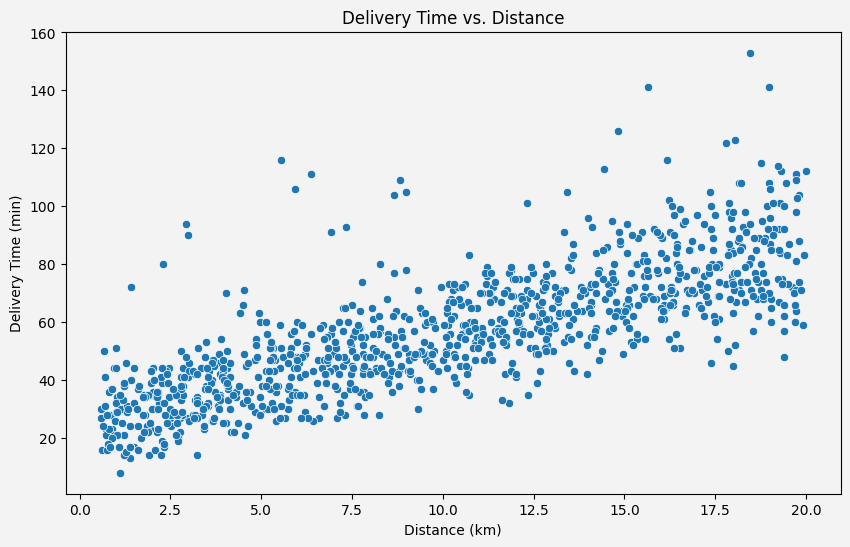


Correlation between Distance_km and Delivery_Time_min: 0.78


In [ ]:
# Plot the relationship between Distance_km and Delivery_Time_min
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df)
plt.title('Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.show()

# Calculate the correlation between Distance_km and Delivery_Time_min
correlation = df['Distance_km'].corr(df['Delivery_Time_min'])
print(f"\nCorrelation between Distance_km and Delivery_Time_min: {correlation:.2f}")

The correlation of 0.78 between Distance_km and Delivery_Time_min indicates a strong positive relationship.

## What is the distribution of delivery times across different `Weather` conditions and `Traffic_Level`?

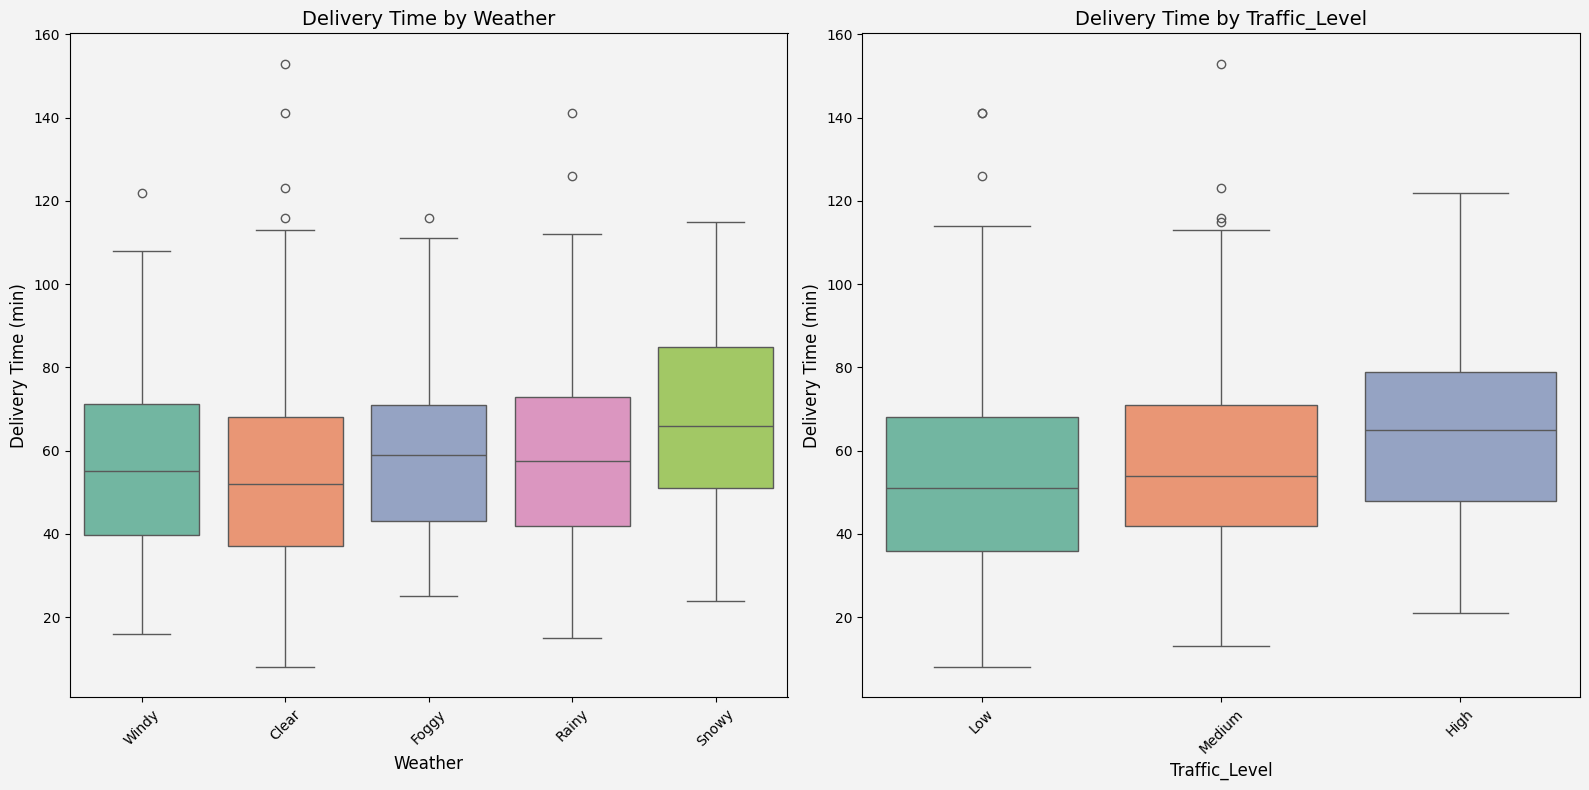

In [ ]:
# Create a 2x2 grid for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes = axes.flatten()

features = ['Weather', 'Traffic_Level']
# Loop through each categorical feature and plot
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='Delivery_Time_min', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Delivery Time by {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Delivery Time (min)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Clear conditions lead to the fastest delivery times and Snowy weather show highest median, meaning deliveries take longer.
2. Low traffic yields the shortest delivery times.

## Is there a significant difference in `Delivery_Time_min` based on the `Vehicle_Type` used?

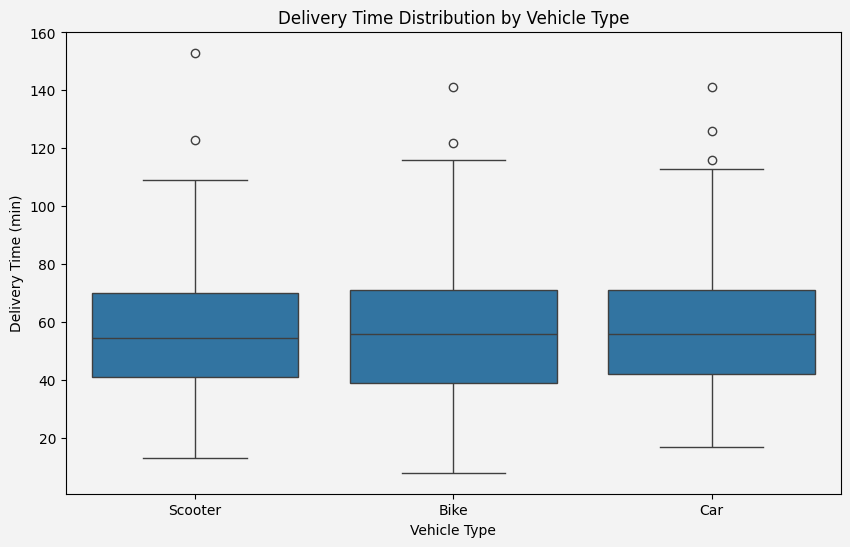

In [ ]:
# Create a box plot for Delivery_Time_min by Vehicle_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df)
plt.title('Delivery Time Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (min)')
plt.show()

Scooter show the lowest median delivery time and the tightest spread, meaning they’re consistently fast and reliable.

## How does the `Time_of_Day` affect the `Delivery_Time_min`?

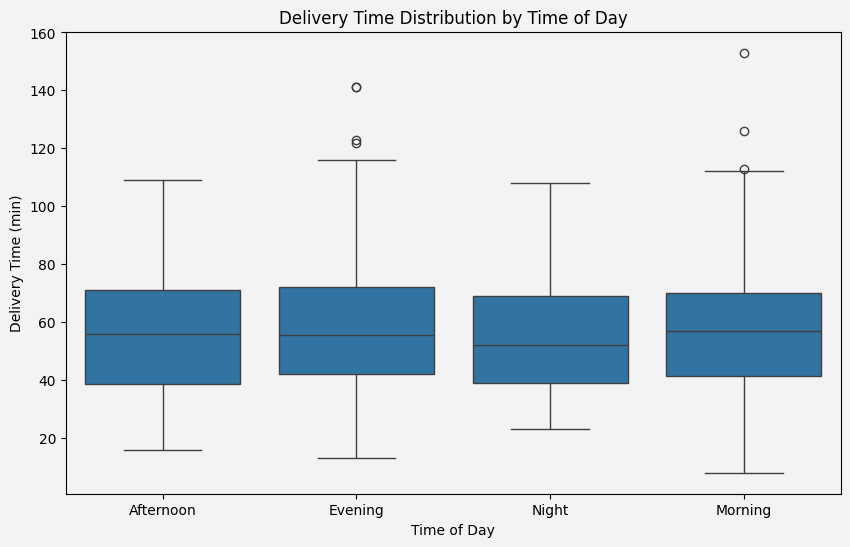

In [ ]:
# Create a box plot for Delivery_Time_min by Time_of_Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=df)
plt.title('Delivery Time Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Time (min)')
plt.show()

Night deliveries have slightly lower median times (~55 minutes).

## Does the `Courier_Experience_yrs` have an impact on the `Delivery_Time_min`?

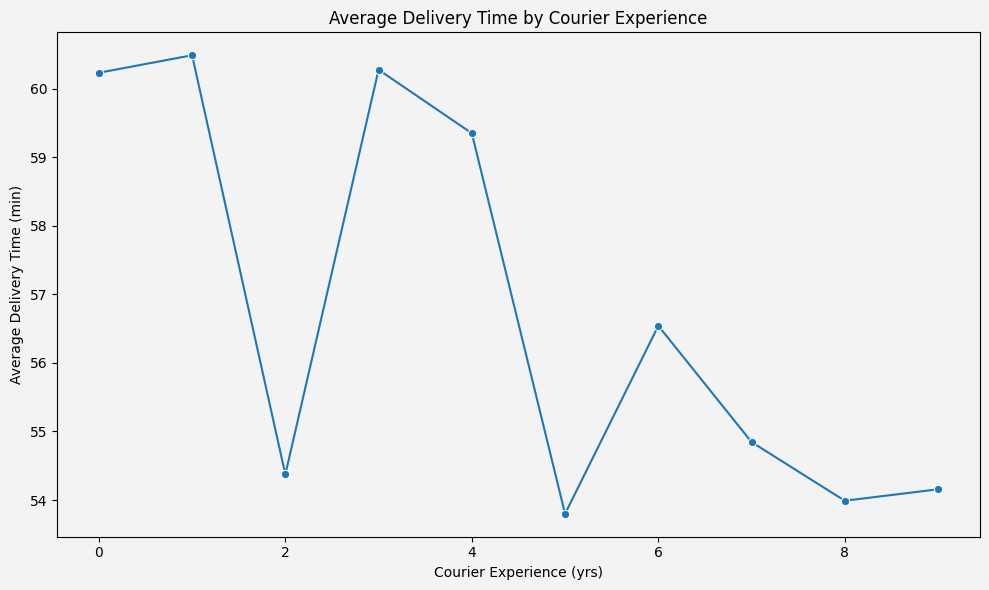

In [ ]:
# Group and calculate mean
experience_avg = df.groupby('Courier_Experience_yrs')['Delivery_Time_min'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=experience_avg, marker='o')
plt.title('Average Delivery Time by Courier Experience')
plt.xlabel('Courier Experience (yrs)')
plt.ylabel('Average Delivery Time (min)')
plt.tight_layout()
plt.show()

Early experience shows a slight higher in average delivery time, peaking around year 2.

The overall range of average delivery time is narrow (about 53–61 minutes), suggesting that experience has a modest but noticeable effect.

## How does the distribution of Total_Time vary across different categorical features like Weather, Traffic_Level, Time_of_Day, and Vehicle_Type?

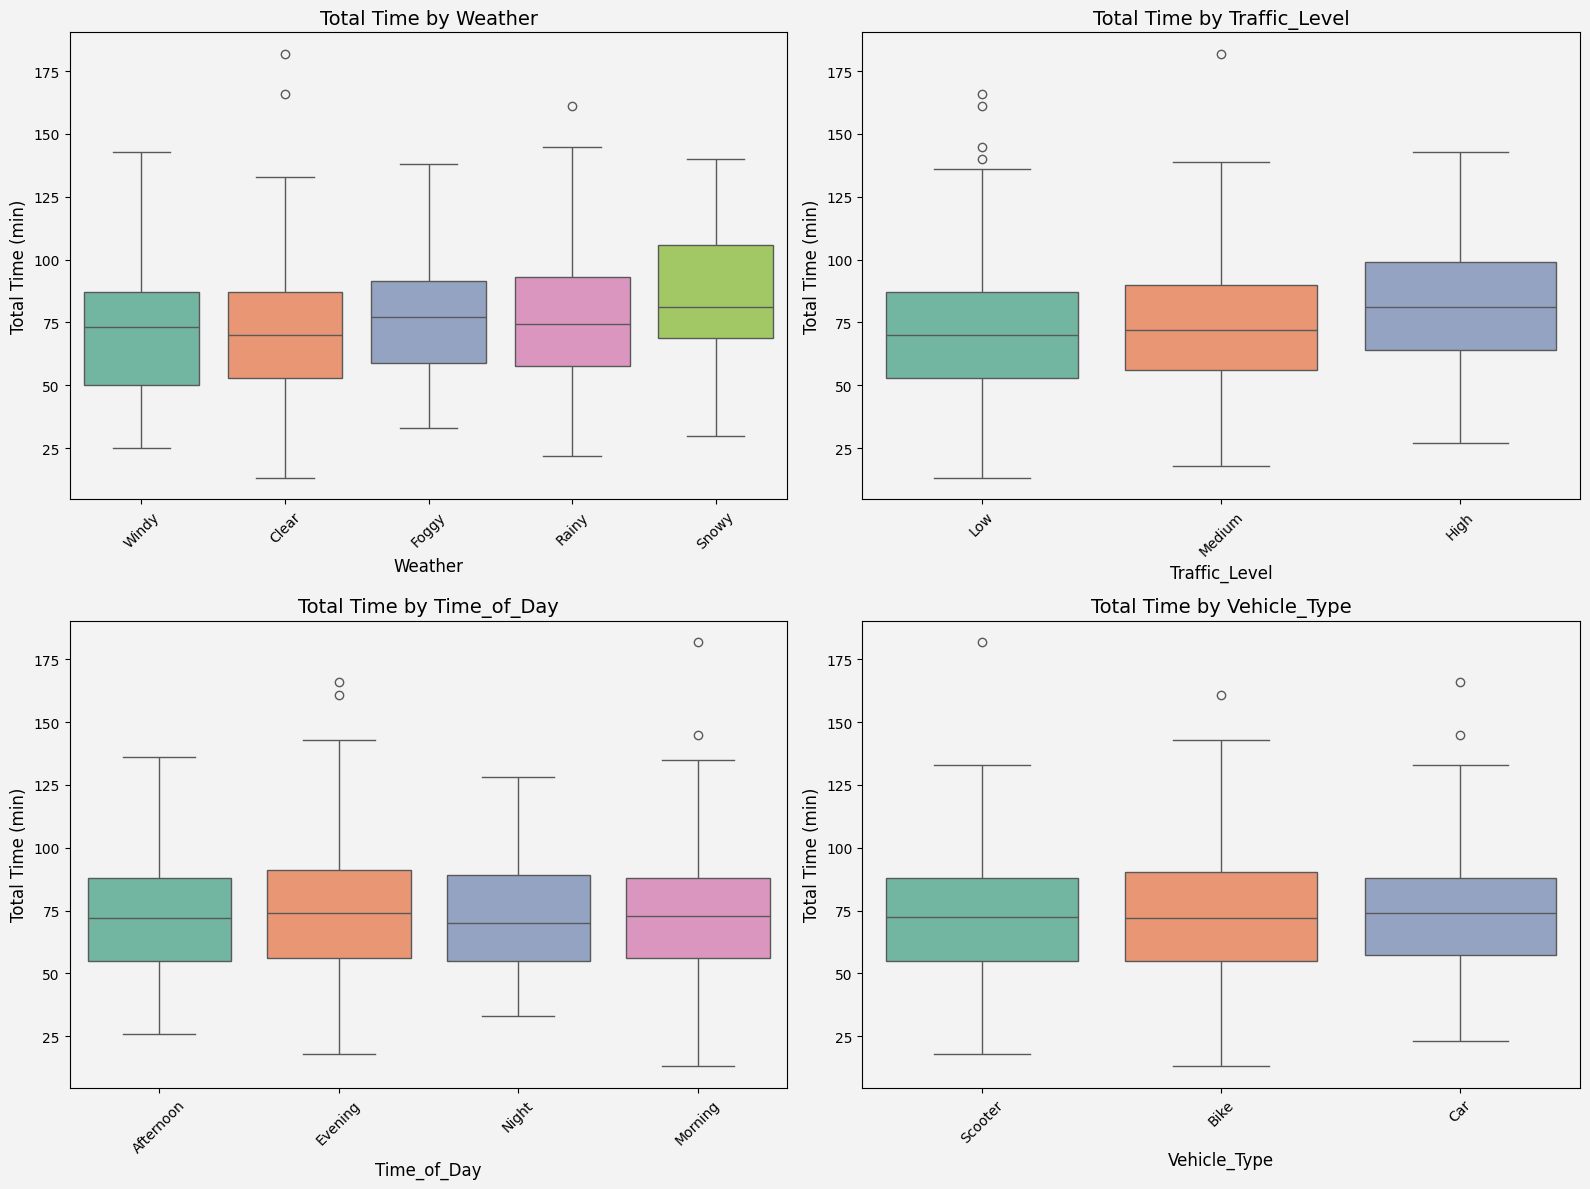

In [ ]:
# Create box plots for Total_Time by categorical features
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='Total_Time', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Total Time by {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Total Time (min)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Clear weather yields the fastest deliveries, lowest median and tight spread. Snowy conditions show the highest median and widest spread, meaning delays are common and unpredictable.
2. High traffic increases both median and variability.
3. Night deliveries have a slightly lower median (~60 mins), possibly due to less traffic and fewer orders.
4. Scooters and Bike have similar median time, but Scooters have tightest spread means they’re fast and consistent.

## Save the final data

In [ ]:
# save df and train/test data
df.to_csv('df_da.csv', index=False)

# Recommendation

**Actionable Recommendation**

1. Optimize for Short-Distance Deliveries

Prioritize routing and batching nearby orders. Consider dynamic pricing to encourage short-distance requests.

2. Streamline Preparation Time

Improve kitchen workflows, automate order prep alerts, and pre-batch high-frequency items.

3. Deploy Scooters Strategically

Assign scooters to high-density zones or time-sensitive deliveries, especially during peak hours.